# **PROJECT UAS PPW**


link aplikasi streamlit :
https://project-ppw-17.streamlit.app/

**Import Library**

In [ ]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import nltk
import re
import joblib
import string

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Data Pre-Processing**

Read & Import Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projectPPW/tugas/radarjatim-uas.csv')
df

,Judul,Content,Category
0,"Dukung Kawasan Industri Berkelanjutan, Bupati ...",GRESIK (RadarJatim.id) — Penerapan kebijakan b...,Ekonomi Bisnis
1,"Bambang Haryo Apresiasi Pedagang Pasar Ngaban,...",SIDOARJO (RadarJatim.id) Ir H Bambang Haryo So...,Ekonomi Bisnis
2,"Komitmen Buka Lebar Lapangan Kerja, Prabowo-Gi...",SURABAYA (RadarJatim.id) Pasangan Calon Presid...,Ekonomi Bisnis
3,"Tak Perlu Mahal dan Dekat Kota, Wonosari Beach...",BANYUWANGI (RadarJatim.id) – Dari pusat kota B...,Ekonomi Bisnis
4,"Bambang Haryo Apresiasi Pedagang Pasar Betro, ...","SIDOARJO (RadarJatim.id) Founder BHS Peduli, I...",Ekonomi Bisnis
...,...,...,...
1270,"FKS Swasta Datangi DPRD Sidoarjo, Curhat Renca...",SIDOARJO (RadarJatim.id) Puluhan orang yang te...,Pendidikan
1271,Tangis Haru Mewarnai Wisuda Al Qur’an SD IT Nu...,SIDOARJO (RadarJatim.id) – Prosesi Wisuda Al Q...,Pendidikan
1272,SMP Muhammdiyah 2 Taman Akhiri Semester Genap ...,SIDOARJO (RadarJatim.id) – Mengakhiri semester...,Pendidikan
1273,"Sinergi Dengan DPR RI, Prodi AP UMSIDA Selengg...",SIDOARJO (RadarJatim.id) — Program Studi Admin...,Pendidikan


In [ ]:
print(f'Jumlah data = {len(df)}')

Jumlah data = 1275


In [ ]:
kelas = df['Category'].value_counts()
kelas

Ekonomi Bisnis        471
Hukum dan Kriminal    433
Pendidikan            371
Name: Category, dtype: int64

In [ ]:
df.isnull().sum()

Judul       0
Content     0
Category    0
dtype: int64

In [ ]:
df.isna().sum()

Judul       0
Content     0
Category    0
dtype: int64

In [ ]:
df.duplicated().sum()

18

Cleansing Data


Proses cleaning data digunakan untuk menghapus karakter tertentu dimana fungsi cleaning digunakan untuk membersihkan teks dalam kolom ‘Content_Artikel’. Ini menghapus karakter-karakter yang tidak relevan seperti tanda baca dan mengubah teks menjadi daftar kata-kata.

In [ ]:
df_new = df.drop_duplicates(subset='Content', keep='first')
df_new = df_new.reset_index(drop=True)
print(f'Jumlah data = {len(df_new)}')

Jumlah data = 1257


In [ ]:
# df = df.dropna(subset=['Judul','Content','Category'])

In [ ]:
df_new

,Judul,Content,Category
0,"Dukung Kawasan Industri Berkelanjutan, Bupati ...",GRESIK (RadarJatim.id) — Penerapan kebijakan b...,Ekonomi Bisnis
1,"Bambang Haryo Apresiasi Pedagang Pasar Ngaban,...",SIDOARJO (RadarJatim.id) Ir H Bambang Haryo So...,Ekonomi Bisnis
2,"Komitmen Buka Lebar Lapangan Kerja, Prabowo-Gi...",SURABAYA (RadarJatim.id) Pasangan Calon Presid...,Ekonomi Bisnis
3,"Tak Perlu Mahal dan Dekat Kota, Wonosari Beach...",BANYUWANGI (RadarJatim.id) – Dari pusat kota B...,Ekonomi Bisnis
4,"Bambang Haryo Apresiasi Pedagang Pasar Betro, ...","SIDOARJO (RadarJatim.id) Founder BHS Peduli, I...",Ekonomi Bisnis
...,...,...,...
1252,"FKS Swasta Datangi DPRD Sidoarjo, Curhat Renca...",SIDOARJO (RadarJatim.id) Puluhan orang yang te...,Pendidikan
1253,Tangis Haru Mewarnai Wisuda Al Qur’an SD IT Nu...,SIDOARJO (RadarJatim.id) – Prosesi Wisuda Al Q...,Pendidikan
1254,SMP Muhammdiyah 2 Taman Akhiri Semester Genap ...,SIDOARJO (RadarJatim.id) – Mengakhiri semester...,Pendidikan
1255,"Sinergi Dengan DPR RI, Prodi AP UMSIDA Selengg...",SIDOARJO (RadarJatim.id) — Program Studi Admin...,Pendidikan


In [ ]:
# membuat kolom baru dengan nama new_abstrak untuk data baru yang dipunctuation
df_new['clean_content'] = df_new['Content'].str.replace('[{}]'.format(string.punctuation), '').str.lower()
# Menghilangkan angka dari kolom 'new_abstrak'
df_new['clean_content'] = df_new['clean_content'].str.replace('\d+', '', regex=True)
df_new['clean_content']

0       gresik radarjatimid — penerapan kebijakan bida...
1       sidoarjo radarjatimid ir h bambang haryo soeka...
2       surabaya radarjatimid pasangan calon presiden ...
3       banyuwangi radarjatimid – dari pusat kota bany...
4       sidoarjo radarjatimid founder bhs peduli ir h ...
                              ...                        
1252    sidoarjo radarjatimid puluhan orang yang terga...
1253    sidoarjo radarjatimid – prosesi wisuda al qur’...
1254    sidoarjo radarjatimid – mengakhiri semester ge...
1255    sidoarjo radarjatimid — program studi administ...
1256    sidoarjo radarjatimid – siswa sma muhammadiyah...
Name: clean_content, Length: 1257, dtype: object

Tokenizing

Fungsi tokenizer digunakan untuk melakukan tokenisasi dan juga proses case folding pada teks yang telah dibersihkan. Ini mengubah teks menjadi token-token kata.

In [ ]:
def tokenizer(text):
  text = text.lower()
  return sent_tokenize(text)

df_new["tokenizing"] = df_new['clean_content'].apply(tokenizer)
df_new["tokenizing"]

0       [gresik radarjatimid — penerapan kebijakan bid...
1       [sidoarjo radarjatimid ir h bambang haryo soek...
2       [surabaya radarjatimid pasangan calon presiden...
3       [banyuwangi radarjatimid – dari pusat kota ban...
4       [sidoarjo radarjatimid founder bhs peduli ir h...
                              ...                        
1252    [sidoarjo radarjatimid puluhan orang yang terg...
1253    [sidoarjo radarjatimid – prosesi wisuda al qur...
1254    [sidoarjo radarjatimid – mengakhiri semester g...
1255    [sidoarjo radarjatimid — program studi adminis...
1256    [sidoarjo radarjatimid – siswa sma muhammadiya...
Name: tokenizing, Length: 1257, dtype: object

In [ ]:
df_new

,Judul,Content,Category,clean_content,tokenizing
0,"Dukung Kawasan Industri Berkelanjutan, Bupati ...",GRESIK (RadarJatim.id) — Penerapan kebijakan b...,Ekonomi Bisnis,gresik radarjatimid — penerapan kebijakan bida...,[gresik radarjatimid — penerapan kebijakan bid...
1,"Bambang Haryo Apresiasi Pedagang Pasar Ngaban,...",SIDOARJO (RadarJatim.id) Ir H Bambang Haryo So...,Ekonomi Bisnis,sidoarjo radarjatimid ir h bambang haryo soeka...,[sidoarjo radarjatimid ir h bambang haryo soek...
2,"Komitmen Buka Lebar Lapangan Kerja, Prabowo-Gi...",SURABAYA (RadarJatim.id) Pasangan Calon Presid...,Ekonomi Bisnis,surabaya radarjatimid pasangan calon presiden ...,[surabaya radarjatimid pasangan calon presiden...
3,"Tak Perlu Mahal dan Dekat Kota, Wonosari Beach...",BANYUWANGI (RadarJatim.id) – Dari pusat kota B...,Ekonomi Bisnis,banyuwangi radarjatimid – dari pusat kota bany...,[banyuwangi radarjatimid – dari pusat kota ban...
4,"Bambang Haryo Apresiasi Pedagang Pasar Betro, ...","SIDOARJO (RadarJatim.id) Founder BHS Peduli, I...",Ekonomi Bisnis,sidoarjo radarjatimid founder bhs peduli ir h ...,[sidoarjo radarjatimid founder bhs peduli ir h...
...,...,...,...,...,...
1252,"FKS Swasta Datangi DPRD Sidoarjo, Curhat Renca...",SIDOARJO (RadarJatim.id) Puluhan orang yang te...,Pendidikan,sidoarjo radarjatimid puluhan orang yang terga...,[sidoarjo radarjatimid puluhan orang yang terg...
1253,Tangis Haru Mewarnai Wisuda Al Qur’an SD IT Nu...,SIDOARJO (RadarJatim.id) – Prosesi Wisuda Al Q...,Pendidikan,sidoarjo radarjatimid – prosesi wisuda al qur’...,[sidoarjo radarjatimid – prosesi wisuda al qur...
1254,SMP Muhammdiyah 2 Taman Akhiri Semester Genap ...,SIDOARJO (RadarJatim.id) – Mengakhiri semester...,Pendidikan,sidoarjo radarjatimid – mengakhiri semester ge...,[sidoarjo radarjatimid – mengakhiri semester g...
1255,"Sinergi Dengan DPR RI, Prodi AP UMSIDA Selengg...",SIDOARJO (RadarJatim.id) — Program Studi Admin...,Pendidikan,sidoarjo radarjatimid — program studi administ...,[sidoarjo radarjatimid — program studi adminis...


In [ ]:
# menggabungkan kata
df_new['final_content'] = df_new['tokenizing'].apply(lambda x: ' '.join(x))
df_new

,Judul,Content,Category,clean_content,tokenizing,final_content
0,"Dukung Kawasan Industri Berkelanjutan, Bupati ...",GRESIK (RadarJatim.id) — Penerapan kebijakan b...,Ekonomi Bisnis,gresik radarjatimid — penerapan kebijakan bida...,[gresik radarjatimid — penerapan kebijakan bid...,gresik radarjatimid — penerapan kebijakan bida...
1,"Bambang Haryo Apresiasi Pedagang Pasar Ngaban,...",SIDOARJO (RadarJatim.id) Ir H Bambang Haryo So...,Ekonomi Bisnis,sidoarjo radarjatimid ir h bambang haryo soeka...,[sidoarjo radarjatimid ir h bambang haryo soek...,sidoarjo radarjatimid ir h bambang haryo soeka...
2,"Komitmen Buka Lebar Lapangan Kerja, Prabowo-Gi...",SURABAYA (RadarJatim.id) Pasangan Calon Presid...,Ekonomi Bisnis,surabaya radarjatimid pasangan calon presiden ...,[surabaya radarjatimid pasangan calon presiden...,surabaya radarjatimid pasangan calon presiden ...
3,"Tak Perlu Mahal dan Dekat Kota, Wonosari Beach...",BANYUWANGI (RadarJatim.id) – Dari pusat kota B...,Ekonomi Bisnis,banyuwangi radarjatimid – dari pusat kota bany...,[banyuwangi radarjatimid – dari pusat kota ban...,banyuwangi radarjatimid – dari pusat kota bany...
4,"Bambang Haryo Apresiasi Pedagang Pasar Betro, ...","SIDOARJO (RadarJatim.id) Founder BHS Peduli, I...",Ekonomi Bisnis,sidoarjo radarjatimid founder bhs peduli ir h ...,[sidoarjo radarjatimid founder bhs peduli ir h...,sidoarjo radarjatimid founder bhs peduli ir h ...
...,...,...,...,...,...,...
1252,"FKS Swasta Datangi DPRD Sidoarjo, Curhat Renca...",SIDOARJO (RadarJatim.id) Puluhan orang yang te...,Pendidikan,sidoarjo radarjatimid puluhan orang yang terga...,[sidoarjo radarjatimid puluhan orang yang terg...,sidoarjo radarjatimid puluhan orang yang terga...
1253,Tangis Haru Mewarnai Wisuda Al Qur’an SD IT Nu...,SIDOARJO (RadarJatim.id) – Prosesi Wisuda Al Q...,Pendidikan,sidoarjo radarjatimid – prosesi wisuda al qur’...,[sidoarjo radarjatimid – prosesi wisuda al qur...,sidoarjo radarjatimid – prosesi wisuda al qur’...
1254,SMP Muhammdiyah 2 Taman Akhiri Semester Genap ...,SIDOARJO (RadarJatim.id) – Mengakhiri semester...,Pendidikan,sidoarjo radarjatimid – mengakhiri semester ge...,[sidoarjo radarjatimid – mengakhiri semester g...,sidoarjo radarjatimid – mengakhiri semester ge...
1255,"Sinergi Dengan DPR RI, Prodi AP UMSIDA Selengg...",SIDOARJO (RadarJatim.id) — Program Studi Admin...,Pendidikan,sidoarjo radarjatimid — program studi administ...,[sidoarjo radarjatimid — program studi adminis...,sidoarjo radarjatimid — program studi administ...


In [ ]:
df_new.to_csv('radarjatim-clean.csv', index=False)

Ekstraksi Fitur

Menggunakan TF-IDF yaitu metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
tfidf_matrix = tfidf_vectorizer.fit_transform(df_new['final_content'])

# Membuat DataFrame dari hasil TF-IDF
tfidf_data_content = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Cetak DataFrame TF-IDF
tfidf_data_content

,aa,aabila,aac,aaji,aamiiin,aamiin,aap,aaron,ab,aba,...,zulkifli,zumami,zuna,zuraidah,zurasta,استعداد,الجديد,الدراسي,العام,لاستقبال
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menyimpan DataFrame ke dalam berkas CSV
tfidf_data_content.to_csv('tfidf_radarjatim.csv', index=False)

In [ ]:
data_label = df_new['Category']
data_label

0       Ekonomi Bisnis
1       Ekonomi Bisnis
2       Ekonomi Bisnis
3       Ekonomi Bisnis
4       Ekonomi Bisnis
             ...      
1252        Pendidikan
1253        Pendidikan
1254        Pendidikan
1255        Pendidikan
1256        Pendidikan
Name: Category, Length: 1257, dtype: object

In [ ]:
data_tfidf = pd.concat([tfidf_data_content, data_label],axis=1)
data_tfidf

,aa,aabila,aac,aaji,aamiiin,aamiin,aap,aaron,ab,aba,...,zumami,zuna,zuraidah,zurasta,استعداد,الجديد,الدراسي,العام,لاستقبال,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ekonomi Bisnis
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ekonomi Bisnis
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ekonomi Bisnis
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ekonomi Bisnis
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ekonomi Bisnis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
1253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
1254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan
1255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pendidikan


**LDA (Latent Dirichlet Allocation)**

Latent Dirichlet Allocation (LDA) adalah model probabilistik generatif dari koleksi data diskrit seperti korpus teks. Ide dasarnya adalah bahwa dokumen direpresentasikan sebagai campuran acak atas topik laten (tidak terlihat). LDA merupakan model Bayesian hirarki tiga tingkat, di mana setiap item koleksi dimodelkan sebagai campuran terbatas atas serangkaian set topik. Setiap topik dimodelkan sebagai campuran tak terbatas melalui set yang mendasari probabilitas topik. Dalam konteks pembuatan model teks, probabilitas topik memberikan representasi eksplisit dari sebuah dokumen.

In [ ]:
import numpy as np
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import os

In [ ]:
#Train and Test split
X = data_tfidf.drop('Category', axis=1)
y = data_tfidf['Category']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
k = 3
alpha = 0.1
beta = 0.2

lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)
# Proporsi topik pada dokumen
proporsi_topik_dokumen = lda_model.fit_transform(X_train)
proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=['Topik 1', 'Topik 2', 'Topik 3'])
# proporsi_topik_dokumen_df.insert(0,'stemmed_tokens', abstrak)
proporsi_topik_dokumen_df

,Topik 1,Topik 2,Topik 3
0,0.009605,0.980789,0.009606
1,0.009439,0.380183,0.610378
2,0.586346,0.401969,0.011684
3,0.008539,0.982926,0.008535
4,0.008301,0.729625,0.262074
...,...,...,...
1000,0.008271,0.983459,0.008271
1001,0.009433,0.981134,0.009433
1002,0.260623,0.728085,0.011292
1003,0.011688,0.976624,0.011688


In [ ]:
proporsi_topik_dokumen_df.to_csv('data_topik.csv', index=False)

In [ ]:
joblib.dump(lda_model, 'LDA-new.joblib')

['LDA-new.joblib']

In [ ]:
data_topik = pd.concat([proporsi_topik_dokumen_df, data_label],axis=1)
data_topik

,Topik 1,Topik 2,Topik 3,Category
0,0.009605,0.980789,0.009606,Ekonomi Bisnis
1,0.009439,0.380183,0.610378,Ekonomi Bisnis
2,0.586346,0.401969,0.011684,Ekonomi Bisnis
3,0.008539,0.982926,0.008535,Ekonomi Bisnis
4,0.008301,0.729625,0.262074,Ekonomi Bisnis
...,...,...,...,...
1252,NaN,NaN,NaN,Pendidikan
1253,NaN,NaN,NaN,Pendidikan
1254,NaN,NaN,NaN,Pendidikan
1255,NaN,NaN,NaN,Pendidikan


In [ ]:
data_topik.isna()
data_topik.dropna(subset=['Topik 1', 'Topik 2', 'Topik 3', 'Category'],inplace = True)
# Cek kembali nilai NaN
data_topik

,Topik 1,Topik 2,Topik 3,Category
0,0.009605,0.980789,0.009606,Ekonomi Bisnis
1,0.009439,0.380183,0.610378,Ekonomi Bisnis
2,0.586346,0.401969,0.011684,Ekonomi Bisnis
3,0.008539,0.982926,0.008535,Ekonomi Bisnis
4,0.008301,0.729625,0.262074,Ekonomi Bisnis
...,...,...,...,...
1000,0.008271,0.983459,0.008271,Pendidikan
1001,0.009433,0.981134,0.009433,Pendidikan
1002,0.260623,0.728085,0.011292,Pendidikan
1003,0.011688,0.976624,0.011688,Pendidikan


In [ ]:
# Menyimpan DataFrame ke dalam berkas CSV
data_topik.to_csv('data_3topik.csv', index=False)

**Modelling**

Pemodelan data adalah proses menciptakan representasi visual atau cetak biru yang menentukan pengumpulan informasi dan sistem manajemen berbagai organisasi. Cetak biru atau model data ini membantu berbagai pemangku kepentingan, seperti analis, ilmuwan, dan perekayasa data untuk menciptakan pandangan terpadu mengenai data organisasi. Model tersebut menguraikan data yang dikumpulkan oleh bisnis, hubungan antara berbagai set data, dan metode yang akan digunakan untuk menyimpan serta menganalisis data.

In [ ]:
#Train and Test split
X_topik = data_topik.drop('Category', axis=1)
y_topik = data_topik['Category']
X_topik_train,X_topik_test,y_topik_train,y_topik_test= train_test_split(X_topik,y_topik,test_size=0.2,random_state=42)

Naive Bayes & KNN

In [ ]:
# naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
Y_prediction = nb.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_nb = round(nb.score(X_train, y_train) * 100, 2)
print('akurasi nb', acc_nb)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred_knn)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

print('akurasi knn', acc_knn)

akurasi nb 100.0
akurasi knn 93.53


Support Vector Mechine (SVM)

In [ ]:
from sklearn import svm
C = 1.0
gamma = 0.1
kernel = 'rbf'
model_svm = svm.SVC(C=C, gamma=gamma, kernel=kernel)
model_svm.fit(X_train, y_train)
# Prediksi pada data uji
predictions = model_svm.predict(X_test)
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
acc_svm = accuracy_score(y_test, predictions)
print(f'Akurasi: {acc_svm}')

Akurasi: 0.9087301587301587


**Evaluasi**

Confusion Matriks

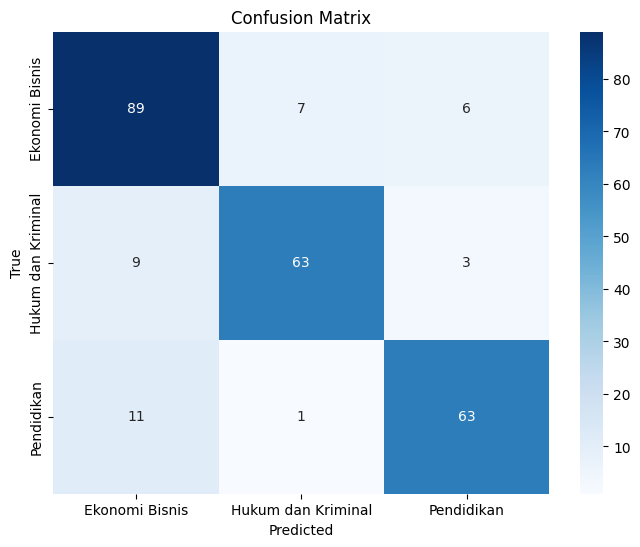

In [ ]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test,Y_prediction)
plot_confusion_matrix(cm)

In [ ]:
joblib.dump(lda_model, 'LDA')

['LDA']

In [ ]:
joblib.dump(knn, 'knn_model')

['knn_model']

**Text Klasifikasi**

Klasifikasi teks adalah proses pemberian tag atau kategori ke teks menurut isinya. Klasifikasi teks dapat digunakan untuk mengatur, menyusun, dan mengkategorikan hampir semua hal.

In [ ]:
df_new = df_new.rename(columns={'final_content': 'summary'})
df_new

,Judul,Content,Category,clean_content,tokenizing,summary
0,"Dukung Kawasan Industri Berkelanjutan, Bupati ...",GRESIK (RadarJatim.id) — Penerapan kebijakan b...,Ekonomi Bisnis,gresik radarjatimid — penerapan kebijakan bida...,[gresik radarjatimid — penerapan kebijakan bid...,gresik radarjatimid — penerapan kebijakan bida...
1,"Bambang Haryo Apresiasi Pedagang Pasar Ngaban,...",SIDOARJO (RadarJatim.id) Ir H Bambang Haryo So...,Ekonomi Bisnis,sidoarjo radarjatimid ir h bambang haryo soeka...,[sidoarjo radarjatimid ir h bambang haryo soek...,sidoarjo radarjatimid ir h bambang haryo soeka...
2,"Komitmen Buka Lebar Lapangan Kerja, Prabowo-Gi...",SURABAYA (RadarJatim.id) Pasangan Calon Presid...,Ekonomi Bisnis,surabaya radarjatimid pasangan calon presiden ...,[surabaya radarjatimid pasangan calon presiden...,surabaya radarjatimid pasangan calon presiden ...
3,"Tak Perlu Mahal dan Dekat Kota, Wonosari Beach...",BANYUWANGI (RadarJatim.id) – Dari pusat kota B...,Ekonomi Bisnis,banyuwangi radarjatimid – dari pusat kota bany...,[banyuwangi radarjatimid – dari pusat kota ban...,banyuwangi radarjatimid – dari pusat kota bany...
4,"Bambang Haryo Apresiasi Pedagang Pasar Betro, ...","SIDOARJO (RadarJatim.id) Founder BHS Peduli, I...",Ekonomi Bisnis,sidoarjo radarjatimid founder bhs peduli ir h ...,[sidoarjo radarjatimid founder bhs peduli ir h...,sidoarjo radarjatimid founder bhs peduli ir h ...
...,...,...,...,...,...,...
1252,"FKS Swasta Datangi DPRD Sidoarjo, Curhat Renca...",SIDOARJO (RadarJatim.id) Puluhan orang yang te...,Pendidikan,sidoarjo radarjatimid puluhan orang yang terga...,[sidoarjo radarjatimid puluhan orang yang terg...,sidoarjo radarjatimid puluhan orang yang terga...
1253,Tangis Haru Mewarnai Wisuda Al Qur’an SD IT Nu...,SIDOARJO (RadarJatim.id) – Prosesi Wisuda Al Q...,Pendidikan,sidoarjo radarjatimid – prosesi wisuda al qur’...,[sidoarjo radarjatimid – prosesi wisuda al qur...,sidoarjo radarjatimid – prosesi wisuda al qur’...
1254,SMP Muhammdiyah 2 Taman Akhiri Semester Genap ...,SIDOARJO (RadarJatim.id) – Mengakhiri semester...,Pendidikan,sidoarjo radarjatimid – mengakhiri semester ge...,[sidoarjo radarjatimid – mengakhiri semester g...,sidoarjo radarjatimid – mengakhiri semester ge...
1255,"Sinergi Dengan DPR RI, Prodi AP UMSIDA Selengg...",SIDOARJO (RadarJatim.id) — Program Studi Admin...,Pendidikan,sidoarjo radarjatimid — program studi administ...,[sidoarjo radarjatimid — program studi adminis...,sidoarjo radarjatimid — program studi administ...


In [ ]:
df_sm = df_new['summary']
df_sm

0       gresik radarjatimid — penerapan kebijakan bida...
1       sidoarjo radarjatimid ir h bambang haryo soeka...
2       surabaya radarjatimid pasangan calon presiden ...
3       banyuwangi radarjatimid – dari pusat kota bany...
4       sidoarjo radarjatimid founder bhs peduli ir h ...
                              ...                        
1252    sidoarjo radarjatimid puluhan orang yang terga...
1253    sidoarjo radarjatimid – prosesi wisuda al qur’...
1254    sidoarjo radarjatimid – mengakhiri semester ge...
1255    sidoarjo radarjatimid — program studi administ...
1256    sidoarjo radarjatimid – siswa sma muhammadiyah...
Name: summary, Length: 1257, dtype: object

In [ ]:
data_final_sm = pd.concat([df_sm, data_label],axis=1)
data_final_sm

,summary,Category
0,gresik radarjatimid — penerapan kebijakan bida...,Ekonomi Bisnis
1,sidoarjo radarjatimid ir h bambang haryo soeka...,Ekonomi Bisnis
2,surabaya radarjatimid pasangan calon presiden ...,Ekonomi Bisnis
3,banyuwangi radarjatimid – dari pusat kota bany...,Ekonomi Bisnis
4,sidoarjo radarjatimid founder bhs peduli ir h ...,Ekonomi Bisnis
...,...,...
1252,sidoarjo radarjatimid puluhan orang yang terga...,Pendidikan
1253,sidoarjo radarjatimid – prosesi wisuda al qur’...,Pendidikan
1254,sidoarjo radarjatimid – mengakhiri semester ge...,Pendidikan
1255,sidoarjo radarjatimid — program studi administ...,Pendidikan


In [ ]:
data_final_sm.isna()
data_final_sm.dropna(subset=['summary', 'Category'],inplace = True)
# Cek kembali nilai NaN
data_final_sm

,summary,Category
0,gresik radarjatimid — penerapan kebijakan bida...,Ekonomi Bisnis
1,sidoarjo radarjatimid ir h bambang haryo soeka...,Ekonomi Bisnis
2,surabaya radarjatimid pasangan calon presiden ...,Ekonomi Bisnis
3,banyuwangi radarjatimid – dari pusat kota bany...,Ekonomi Bisnis
4,sidoarjo radarjatimid founder bhs peduli ir h ...,Ekonomi Bisnis
...,...,...
1252,sidoarjo radarjatimid puluhan orang yang terga...,Pendidikan
1253,sidoarjo radarjatimid – prosesi wisuda al qur’...,Pendidikan
1254,sidoarjo radarjatimid – mengakhiri semester ge...,Pendidikan
1255,sidoarjo radarjatimid — program studi administ...,Pendidikan


In [ ]:
data_final_sm.to_csv('data_final_sm.csv', index=False)

In [ ]:
vectorizer_summary = TfidfVectorizer()
X_summary = vectorizer_summary.fit_transform(data_final_sm['summary']).toarray()
y = data_final_sm["Category"]

In [ ]:
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(X_summary, y, test_size=0.3, random_state=42)

In [ ]:
# Inisialisasi model Naive Bayes Gaussian
gnb_summary = GaussianNB()

# Melatih model menggunakan data latih
gnb_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_gnb_summary = gnb_summary.predict(X_test_summary)

In [ ]:
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_gnb_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 0.8624338624338624


In [ ]:
# Inisialisasi model KNN
knn_summary = KNeighborsClassifier(n_neighbors=5)  # Sesuaikan jumlah tetangga (n_neighbors) sesuai kebutuhan

# Melatih model menggunakan data latih
knn_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_knn_summary = knn_summary.predict(X_test_summary)

In [ ]:
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_knn_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 0.9074074074074074


In [ ]:
data_final_sm['summary'][1028]

'sidoarjo radarjatimid — walaupun sudah bermitra dengan sekitar  dudika dunia industri dan dunia kerja lebih smk krian  sidoarjo terus mengembangkan sayapnya bekerjasama menyelaraskan atau melakukan sinkroninasi kurikulum agar kompetensi siswanya sesuai dengan kebutuhan industri sehingga smk krian  sidoarjo menjalankan program ‘link and match’ lagi dengan  dudika pada jumat  pagi prosesi pembukaanya dilakukan langsung oleh kepala smk krian  sidoarjo dhini mekarsari spd m mpd \xa0didampingi waka humas smk krian  sidoarjo ahmad robby skom dhini mekarsari menuturkan kalau pihaknya tetap berkomitmen dalam mencetak lulusan yang jujur kompeten dan mampu bersaing di dunia kerja “oleh karena itu kami terus mengasah bakat dan kemampuan siswa dalam jurusan yang dipilih serta menjadikannya siap kerja siap kuliah dan siap berwirausaha” tuturnya “inilah bentuk kegiatan kami dalam program link and match dengan perusahaan “dengan harapan siswa bisa dapat pengalaman dari diduka sementara pihak perusah

In [ ]:
new_data = ["sidoarjo radarjatimid — walaupun sudah bermitra dengan sekitar  dudika dunia industri dan dunia kerja lebih smk krian  sidoarjo terus mengembangkan sayapnya bekerjasama menyelaraskan atau melakukan sinkroninasi kurikulum agar kompetensi siswanya sesuai dengan kebutuhan industri sehingga smk krian  sidoarjo menjalankan program ‘link and match’ lagi dengan  dudika pada jumat  pagi prosesi pembukaanya dilakukan langsung oleh kepala smk krian  sidoarjo dhini mekarsari spd m mpd  didampingi waka humas smk krian  sidoarjo ahmad robby skom dhini mekarsari menuturkan kalau pihaknya tetap berkomitmen dalam mencetak lulusan yang jujur kompeten dan mampu bersaing di dunia kerja “oleh karena itu kami terus mengasah bakat dan kemampuan siswa dalam jurusan yang dipilih serta menjadikannya siap kerja siap kuliah dan siap berwirausaha” tuturnya “inilah bentuk kegiatan kami dalam program link and match dengan perusahaan “dengan harapan siswa bisa dapat pengalaman dari diduka sementara pihak perusahaan juga bisa memilih tenaga kerja yang sesuai dengan kebutuhannya” harapnya sementara itu salah satu industri yang ikut dalam program ‘link and match’ adalah hrd pt kirana tyas adriani mengatakan kalau kegiatan sinkronisasi kurikulum ini sangat bagus untuk bisa menyelaraskan kebutuhan industri saat ini dengan kurikulum yang ada di sekolah menurutnya pihak sekolah bisa mengetahui kompetensi dan keahlian apa saja yang dibutuhkan oleh dunia industri sebagai panduan untuk bisa diajarkan ke murid muridnya di sekolah “harapannya muridmurid yang lulus nanti sudah memiliki bekal keahlian yang sesuai dengan apa yang dibutuhkan dunia kerjaindustri saat ini dan dengan mudah terserap dan beradaptasi sebagai tenaga kerja di dunia kerjaindustri” harap tyas adriani adapun pihak dudika yang hadir dalam program link and match smk krian  sidoarjo diantaranya industry  induteknik pemesinan  pt pangestu guna gloves pt seger agro nusantara pt dwitura mitra sejahtera pt bahtera bersaudara teknik instalasi tenaga listrik pt semesta eltrindo pura pt esdeka fuulray sienci pt wismatata eltra perkasa pt duta mandiri perkasa abadi rekayasa perangkat lunak pt indo bismar pt garuda food pt sinergi dinas kominfo surabaya teknik pengelasan pt kampuh welding indonesia pt kirana pt corin mulia gemilang teknik logistik pt kokoh inti arebama pt dian mega kurnia pt kantor pos surabaya pt rajawali tanjung injiniring pt kantor pos sidaorjomad"]
new_data_summary = tokenizer(new_data[0])
new_data_summary

['sidoarjo radarjatimid — walaupun sudah bermitra dengan sekitar  dudika dunia industri dan dunia kerja lebih smk krian  sidoarjo terus mengembangkan sayapnya bekerjasama menyelaraskan atau melakukan sinkroninasi kurikulum agar kompetensi siswanya sesuai dengan kebutuhan industri sehingga smk krian  sidoarjo menjalankan program ‘link and match’ lagi dengan  dudika pada jumat  pagi prosesi pembukaanya dilakukan langsung oleh kepala smk krian  sidoarjo dhini mekarsari spd m mpd \xa0didampingi waka humas smk krian  sidoarjo ahmad robby skom dhini mekarsari menuturkan kalau pihaknya tetap berkomitmen dalam mencetak lulusan yang jujur kompeten dan mampu bersaing di dunia kerja “oleh karena itu kami terus mengasah bakat dan kemampuan siswa dalam jurusan yang dipilih serta menjadikannya siap kerja siap kuliah dan siap berwirausaha” tuturnya “inilah bentuk kegiatan kami dalam program link and match dengan perusahaan “dengan harapan siswa bisa dapat pengalaman dari diduka sementara pihak perusa

In [ ]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary[0]]).toarray()
tfidf_Xnew_summary

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pred_knn_summary = knn_summary.predict(tfidf_Xnew_summary)
pred_knn_summary[0]

'Pendidikan'

**Menggunakan Topik (LDA)**

In [ ]:
def create_topic_proportion_df(X_summary, k, alpha, beta):
    lda_model = LatentDirichletAllocation(n_components=k, doc_topic_prior=alpha, topic_word_prior=beta)

    proporsi_topik_dokumen = lda_model.fit_transform(X_summary)

    nama_kolom_topik = [f'Topik {i+1}' for i in range(k)]

    proporsi_topik_dokumen_df = pd.DataFrame(proporsi_topik_dokumen, columns=nama_kolom_topik)

    return proporsi_topik_dokumen_df

In [ ]:
vectorizer_summary = TfidfVectorizer()
tfidf_text = vectorizer_summary.fit_transform(data_final_sm['summary']).toarray()
X_summary = create_topic_proportion_df(tfidf_text, 3, 0.1, 0.2)
y = data_final_sm["Category"]

In [ ]:
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(X_summary, y, test_size=0.3, random_state=42)

In [ ]:
# Inisialisasi model Naive Bayes Gaussian
gnb_summary = GaussianNB()
# Melatih model menggunakan data latih
gnb_summary.fit(X_train_summary, y_train_summary)
# Membuat prediksi pada data uji
y_pred_gnb_summary = gnb_summary.predict(X_test_summary)

In [ ]:
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_gnb_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 0.3253968253968254


In [ ]:
# Inisialisasi model KNN
knn_summary = KNeighborsClassifier(n_neighbors=6)  # Sesuaikan jumlah tetangga (n_neighbors) sesuai kebutuhan

# Melatih model menggunakan data latih
knn_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_knn_summary = knn_summary.predict(X_test_summary)

In [ ]:
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_knn_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 0.37566137566137564


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Inisialisasi model Decision Tree
dt_summary = DecisionTreeClassifier(random_state=42)  # Sesuaikan parameter sesuai kebutuhan

# Melatih model menggunakan data latih
dt_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_dt_summary = dt_summary.predict(X_test_summary)

In [ ]:
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_dt_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 0.3783068783068783


In [ ]:
data_final_sm['summary'][1028]

'sidoarjo radarjatimid — walaupun sudah bermitra dengan sekitar  dudika dunia industri dan dunia kerja lebih smk krian  sidoarjo terus mengembangkan sayapnya bekerjasama menyelaraskan atau melakukan sinkroninasi kurikulum agar kompetensi siswanya sesuai dengan kebutuhan industri sehingga smk krian  sidoarjo menjalankan program ‘link and match’ lagi dengan  dudika pada jumat  pagi prosesi pembukaanya dilakukan langsung oleh kepala smk krian  sidoarjo dhini mekarsari spd m mpd \xa0didampingi waka humas smk krian  sidoarjo ahmad robby skom dhini mekarsari menuturkan kalau pihaknya tetap berkomitmen dalam mencetak lulusan yang jujur kompeten dan mampu bersaing di dunia kerja “oleh karena itu kami terus mengasah bakat dan kemampuan siswa dalam jurusan yang dipilih serta menjadikannya siap kerja siap kuliah dan siap berwirausaha” tuturnya “inilah bentuk kegiatan kami dalam program link and match dengan perusahaan “dengan harapan siswa bisa dapat pengalaman dari diduka sementara pihak perusah

In [ ]:
new_data = ["sidoarjo radarjatimid — walaupun sudah bermitra dengan sekitar  dudika dunia industri dan dunia kerja lebih smk krian  sidoarjo terus mengembangkan sayapnya bekerjasama menyelaraskan atau melakukan sinkroninasi kurikulum agar kompetensi siswanya sesuai dengan kebutuhan industri sehingga smk krian  sidoarjo menjalankan program ‘link and match’ lagi dengan  dudika pada jumat  pagi prosesi pembukaanya dilakukan langsung oleh kepala smk krian  sidoarjo dhini mekarsari spd m mpd  didampingi waka humas smk krian  sidoarjo ahmad robby skom dhini mekarsari menuturkan kalau pihaknya tetap berkomitmen dalam mencetak lulusan yang jujur kompeten dan mampu bersaing di dunia kerja “oleh karena itu kami terus mengasah bakat dan kemampuan siswa dalam jurusan yang dipilih serta menjadikannya siap kerja siap kuliah dan siap berwirausaha” tuturnya “inilah bentuk kegiatan kami dalam program link and match dengan perusahaan “dengan harapan siswa bisa dapat pengalaman dari diduka sementara pihak perusahaan juga bisa memilih tenaga kerja yang sesuai dengan kebutuhannya” harapnya sementara itu salah satu industri yang ikut dalam program ‘link and match’ adalah hrd pt kirana tyas adriani mengatakan kalau kegiatan sinkronisasi kurikulum ini sangat bagus untuk bisa menyelaraskan kebutuhan industri saat ini dengan kurikulum yang ada di sekolah menurutnya pihak sekolah bisa mengetahui kompetensi dan keahlian apa saja yang dibutuhkan oleh dunia industri sebagai panduan untuk bisa diajarkan ke murid muridnya di sekolah “harapannya muridmurid yang lulus nanti sudah memiliki bekal keahlian yang sesuai dengan apa yang dibutuhkan dunia kerjaindustri saat ini dan dengan mudah terserap dan beradaptasi sebagai tenaga kerja di dunia kerjaindustri” harap tyas adriani adapun pihak dudika yang hadir dalam program link and match smk krian  sidoarjo diantaranya industry  induteknik pemesinan  pt pangestu guna gloves pt seger agro nusantara pt dwitura mitra sejahtera pt bahtera bersaudara teknik instalasi tenaga listrik pt semesta eltrindo pura pt esdeka fuulray sienci pt wismatata eltra perkasa pt duta mandiri perkasa abadi rekayasa perangkat lunak pt indo bismar pt garuda food pt sinergi dinas kominfo surabaya teknik pengelasan pt kampuh welding indonesia pt kirana pt corin mulia gemilang teknik logistik pt kokoh inti arebama pt dian mega kurnia pt kantor pos surabaya pt rajawali tanjung injiniring pt kantor pos sidaorjomad"]
new_data_summary = tokenizer(new_data[0])
new_data_summary

['sidoarjo radarjatimid — walaupun sudah bermitra dengan sekitar  dudika dunia industri dan dunia kerja lebih smk krian  sidoarjo terus mengembangkan sayapnya bekerjasama menyelaraskan atau melakukan sinkroninasi kurikulum agar kompetensi siswanya sesuai dengan kebutuhan industri sehingga smk krian  sidoarjo menjalankan program ‘link and match’ lagi dengan  dudika pada jumat  pagi prosesi pembukaanya dilakukan langsung oleh kepala smk krian  sidoarjo dhini mekarsari spd m mpd \xa0didampingi waka humas smk krian  sidoarjo ahmad robby skom dhini mekarsari menuturkan kalau pihaknya tetap berkomitmen dalam mencetak lulusan yang jujur kompeten dan mampu bersaing di dunia kerja “oleh karena itu kami terus mengasah bakat dan kemampuan siswa dalam jurusan yang dipilih serta menjadikannya siap kerja siap kuliah dan siap berwirausaha” tuturnya “inilah bentuk kegiatan kami dalam program link and match dengan perusahaan “dengan harapan siswa bisa dapat pengalaman dari diduka sementara pihak perusa

In [ ]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary[0]]).toarray()
topik_tfidf_x = create_topic_proportion_df(tfidf_Xnew_summary, 3, 0.1, 0.2)
topik_tfidf_x

,Topik 1,Topik 2,Topik 3
0,0.982017,0.008992,0.008992


In [ ]:
pred_knn_summary = knn_summary.predict(topik_tfidf_x)
pred_knn_summary[0]

'Ekonomi Bisnis'